## Assignment 1

Import the libraries and data

In [32]:
# importing stuff for drawing plots
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# open the dataframes with the right separators
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

Merge the data

In [2]:
# merge the two dataframes and show the head of the dataframe
df = survey_data.merge(step_data, on = "id")
df.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Run describe en analyseer het op bijzondere waardes. Het maximale gewicht is bv 700.. Interessant om dit verder te analyseren in een boxplot bv.

In [11]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,926.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,4234.604024
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,1573.832912
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,384.615385
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,3642.978579
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,4073.971622
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,4605.849831
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,44871.794872


Maak een boxplot van gewicht, en converteer dan de onmogelijke waarde naar een NaN.

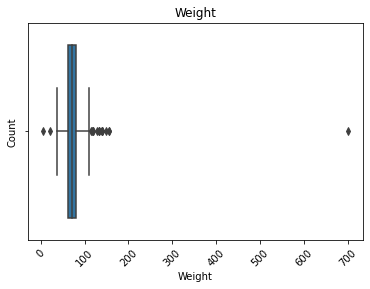

In [12]:
sns.boxplot(x="weight", data=df)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
df['weight']=df['weight'].replace(700,np.nan)

Check with info() which column you want to calculate the mean over. Use the attribute verbose to display all columns

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 338 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    gender       object 
 3    age          object 
 4    hh_size      int64  
 5    education    int64  
 6    education_1  object 
 7    height       float64
 8    weight       float64
 9    20-6-2013    float64
 10   21-6-2013    float64
 11   22-6-2013    float64
 12   23-6-2013    float64
 13   24-6-2013    float64
 14   25-6-2013    float64
 15   26-6-2013    float64
 16   27-6-2013    float64
 17   28-6-2013    float64
 18   29-6-2013    float64
 19   30-6-2013    float64
 20   1-7-2013     float64
 21   2-7-2013     float64
 22   3-7-2013     float64
 23   4-7-2013     float64
 24   5-7-2013     float64
 25   6-7-2013     float64
 26   7-7-2013     float64
 27   8-7-2013     float64
 28   9-7-2013     float64
 29   10-7-2013    float64
 30   11-7-2013    float64
 31

Calculate the mean over all columns for each row. Make sure to add axis=1

In [15]:
df['steps_mean']=df.iloc[:,9:336].mean(axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,steps_mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5505.617978,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4277.777778,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,4611.111111,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4494.382022,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652.694611,5312.129630


Create a histogram and boxplot of steps_mean, and calculate mean, median and std dev.

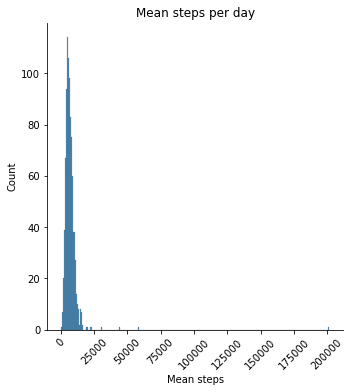

In [16]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

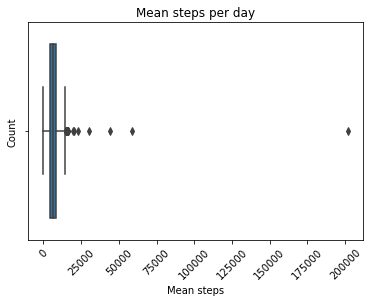

In [17]:
sns.boxplot(x="steps_mean", data=df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6245.006060606061
Mean = 7036.627484984338
St Dev. = 7396.87900787018


you have clearly some outliers and a right skew, more than 100.000 steps would hypothetically be possible, but you can also see that these outlier influence the mean and standard deviation significantly, so I choose to filter out steps above 100.000.

In [20]:
df=df[df['steps_mean']<100000]

In [19]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6245.006060606061
Mean = 7036.627484984338
St Dev. = 7396.87900787018


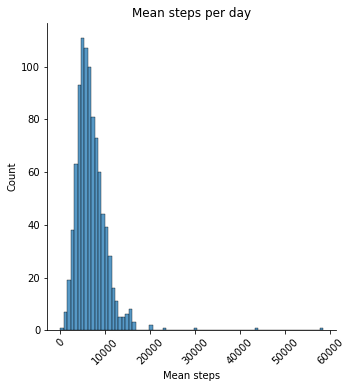

In [13]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Analyse if we see differences in steps for different age groups or educational background

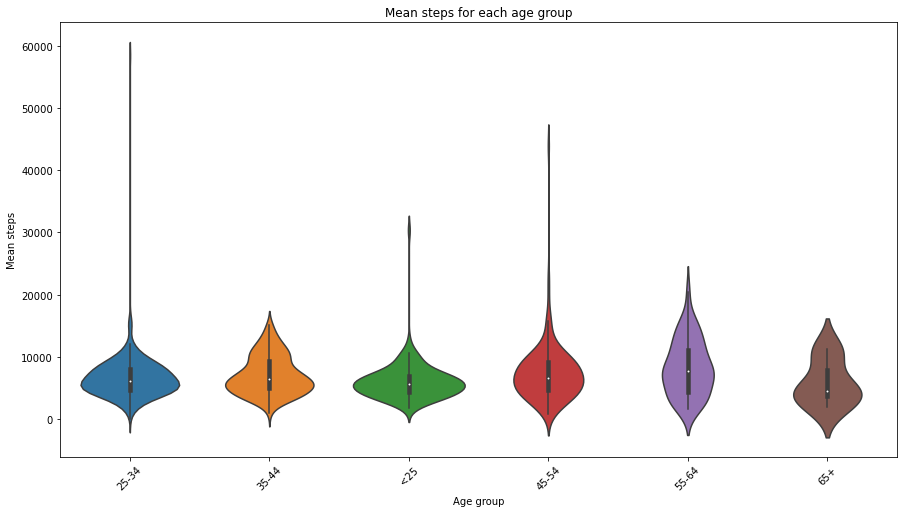

In [21]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.violinplot(x='age',y='steps_mean',data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

It's clear that young people below 25 walk less and older people who can still walk (between 55 and 64) most, the differences within this group are however also bigger.

plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.boxplot(x='education_1',y='steps_mean',data=df)
sns.swarmplot(x='education_1',y='steps_mean', size=3, data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

Educational level does not seem to influence the nr of steps that much. This graph however shows that most people have a bachelor or higher

In [22]:
df['education_1'].value_counts()

Master or doctorate    409
Bachelor               355
High school            106
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

# Assignment week 2

Een bmi variabele creeren die beter een gezond gewicht toont

In [27]:
df["bmi"]=df["weight"]/(df["height"]/100**2)
df.head()

<ipython-input-27-d691f60c4254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi"]=df["weight"]/(df["height"]/100**2)


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,steps_mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5505.617978,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4277.777778,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,4611.111111,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4494.382022,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652.694611,5312.129630


Een pairplot creeren waar bmi wordt vergeleken met het gemiddelde aantal stappen

<function matplotlib.pyplot.show(close=None, block=None)>

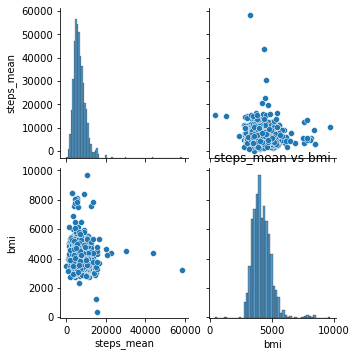

In [25]:
df_sel=df[["steps_mean", "bmi"]]
sns.pairplot(df_sel)
plt.title('steps_mean vs bmi')
plt.xlabel('bmi')
plt.ylabel('steps_mean')
plt.show

De correlatie tussen deze twee variabelen tonen

In [26]:
corr=df_sel.corr()
corr

,steps_mean,bmi
steps_mean,1.000000,-0.069305
bmi,-0.069305,1.000000


# Assignement week 3

Beschrijf lineaire regressie in je eigen woorden:
lineaire regressie toont aan of er een verband is tussen twee variabelen. Hoe dichter het verband bij een r-waarde van 1 of -1 ligt hoe sterker het verband. Hoe dichter de r-waarde bij de 0 zit hoe zwakker het verband. Door een model te maken waar lineaire regressie wordt getoont tussen twee variabelen is het makkelijker om te bepalen of er daadwerkelijk een verband is en als deze er wel is wat het verband precies is.

Creer dummie variabelen voor alle categoriale variabelen:

In [29]:
df_dummies = pd.get_dummies(df,columns=['gender','age','education','hh_size'],drop_first= True)
df_dummies.head()

,id,city,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,education_2,education_3,education_4,education_5,hh_size_2,hh_size_3,hh_size_4,hh_size_5,hh_size_6,hh_size_11
0,1,Bordeaux,Master or doctorate,178.0,98.0,NaN,NaN,NaN,NaN,3941.0,...,0,0,1,0,0,0,1,0,0,0
1,2,Lille,Bachelor,180.0,77.0,NaN,NaN,10473.0,705.0,4287.0,...,0,1,0,0,0,0,0,0,0,0
2,3,Montpellier,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,2553.0,190.0,...,1,0,0,0,1,0,0,0,0,0
3,4,Lyon,Bachelor,178.0,80.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,Montpellier,Bachelor,167.0,61.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0


creer een lineair regressie model waar de gemiddelde stappen voorspeld worden:


In [41]:
y = df['steps_mean']
X = df[['steps_mean',"height","weight","bmi"]]
X.head()

,steps_mean,height,weight,bmi
0,10205.521212,178.0,98.0,5505.617978
1,5687.423313,180.0,77.0,4277.777778
2,8301.729730,180.0,83.0,4611.111111
3,3633.200000,178.0,80.0,4494.382022
4,5312.129630,167.0,61.0,3652.694611


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.head()

,steps_mean,height,weight,bmi
531,11772.773585,170.0,56.0,3294.117647
642,8966.311828,167.0,97.0,5808.383234
423,9342.782609,163.0,66.0,4049.079755
685,4228.534483,153.0,70.0,4575.163399
246,2796.000000,169.0,49.0,2899.408284


In [44]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

voorspel hoe accuraat het model is:

In [45]:
y_test_2 = lm.predict(X_test)
r2_score(y_test, y_test_2)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.